In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

Generate single molecule spectra for model training

In [12]:
k = np.arange(900, 1800, 5)

In [106]:
sig=80

In [107]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [108]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [109]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

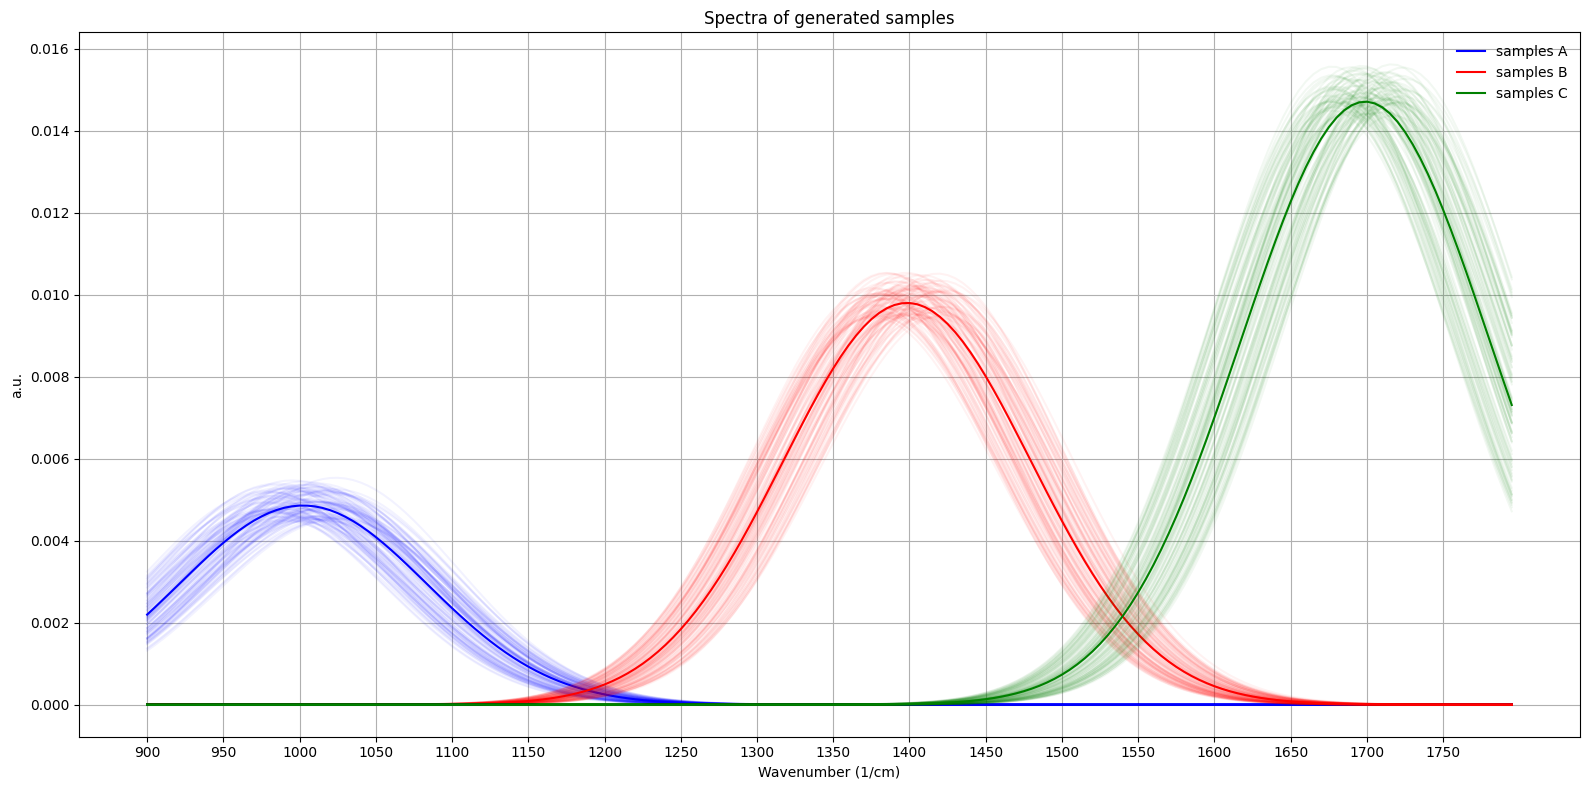

In [110]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [111]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [112]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,2.728327e-03,1.361402e-03,2.113801e-03,1.785632e-03,1.739185e-03,2.625260e-03,1.840483e-03,1.551593e-03,2.545151e-03,3.244615e-03,...,1.134502e-24,1.795769e-23,1.838672e-23,2.227169e-23,1.314907e-25,1.788598e-23,4.581337e-23,7.117232e-26,4.796327e-23,8.717422e-24
905.0,2.906993e-03,1.498100e-03,2.280684e-03,1.948993e-03,1.891135e-03,2.803241e-03,2.009028e-03,1.702005e-03,2.722589e-03,3.440642e-03,...,2.124586e-24,3.291635e-23,3.414277e-23,4.091862e-23,2.501474e-25,3.300995e-23,8.360100e-23,1.364087e-25,8.733152e-23,1.617900e-23
910.0,3.085154e-03,1.642052e-03,2.451095e-03,2.118955e-03,2.048484e-03,2.981651e-03,2.184596e-03,1.859818e-03,2.901100e-03,3.634401e-03,...,3.963288e-24,6.010451e-23,6.314721e-23,7.488626e-23,4.740182e-25,6.068385e-23,1.519694e-22,2.604070e-25,1.584054e-22,2.990925e-23
915.0,3.261331e-03,1.792772e-03,2.623914e-03,2.294704e-03,2.210426e-03,3.159085e-03,2.366393e-03,2.024447e-03,3.079324e-03,3.824222e-03,...,7.364598e-24,1.093293e-22,1.163243e-22,1.365201e-22,8.947302e-25,1.111214e-22,2.751858e-22,4.951568e-25,2.862237e-22,5.507438e-23
920.0,3.433981e-03,1.949643e-03,2.797906e-03,2.475284e-03,2.376032e-03,3.334064e-03,2.553487e-03,2.195172e-03,3.255817e-03,4.008393e-03,...,1.363185e-23,1.981072e-22,2.134262e-22,2.479160e-22,1.682237e-24,2.026834e-22,4.963879e-22,9.378044e-25,5.152024e-22,1.010146e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,1.406995e-24,2.518212e-22,1.346676e-23,8.347835e-23,1.694785e-22,4.432921e-24,3.250767e-22,5.509998e-22,6.734167e-24,2.215021e-24,...,1.094698e-02,8.807037e-03,6.702722e-03,7.906960e-03,1.215575e-02,7.680858e-03,7.541992e-03,1.260241e-02,7.995828e-03,8.088760e-03
1780.0,7.511785e-25,1.392323e-22,7.307136e-24,4.580704e-23,9.414552e-23,2.393924e-24,1.811103e-22,3.079227e-22,3.648855e-24,1.192131e-24,...,1.038457e-02,8.250239e-03,6.176026e-03,7.362328e-03,1.164787e-02,7.134745e-03,7.008705e-03,1.207522e-02,7.448108e-03,7.537669e-03
1785.0,3.994652e-25,7.667952e-23,3.949348e-24,2.503710e-23,5.209762e-23,1.287771e-24,1.005151e-22,1.714187e-22,1.969434e-24,6.391265e-25,...,9.812845e-03,7.699054e-03,5.667975e-03,6.828638e-03,1.111754e-02,6.601511e-03,6.488059e-03,1.152434e-02,6.911387e-03,6.996526e-03


In [113]:
labels_train = pd.DataFrame(df0.columns).rename(columns={0:'sample'})
labels_train.loc[labels_train['sample'].str.contains('A'),'target'] = 'A'
labels_train.loc[labels_train['sample'].str.contains('B'),'target'] = 'B'
labels_train.loc[labels_train['sample'].str.contains('C'),'target'] = 'C'
labels_train = labels_train.set_index('sample')
labels_train


,target
sample,
A_1,A
A_2,A
A_3,A
A_4,A
A_5,A
...,...
C_96,C
C_97,C
C_98,C


Generate mixed molecule spectra for testing the model

In [114]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=sig+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [115]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [116]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,0.001292,0.001057,0.003455,0.002351,0.001776,0.002120,0.000322,0.004948,0.002159,0.000833,...,0.001343,0.000712,0.000611,0.001515,0.001943,0.001544,0.001290,0.004648,0.001240,0.000708
905.0,0.001400,0.001129,0.003772,0.002554,0.001918,0.002291,0.000353,0.005251,0.002322,0.000904,...,0.001462,0.000764,0.000648,0.001621,0.002070,0.001661,0.001375,0.004944,0.001351,0.000761
910.0,0.001512,0.001201,0.004101,0.002763,0.002063,0.002466,0.000387,0.005552,0.002487,0.000978,...,0.001585,0.000817,0.000685,0.001728,0.002197,0.001780,0.001461,0.005239,0.001466,0.000815
915.0,0.001626,0.001272,0.004443,0.002978,0.002211,0.002645,0.000421,0.005847,0.002654,0.001054,...,0.001712,0.000869,0.000721,0.001834,0.002322,0.001900,0.001545,0.005529,0.001584,0.000869
920.0,0.001743,0.001342,0.004794,0.003198,0.002360,0.002826,0.000457,0.006135,0.002820,0.001131,...,0.001841,0.000922,0.000756,0.001939,0.002444,0.002021,0.001628,0.005813,0.001705,0.000923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.001557,0.009053,0.016587,0.002902,0.007964,0.001360,0.014089,0.008403,0.013826,0.009200,...,0.017051,0.001617,0.008499,0.008108,0.012484,0.009003,0.005724,0.006281,0.006776,0.008503
1780.0,0.001449,0.008440,0.015478,0.002760,0.007417,0.001284,0.013222,0.008062,0.013091,0.008580,...,0.016106,0.001499,0.007892,0.007486,0.011644,0.008339,0.005353,0.005973,0.006368,0.008068
1785.0,0.001343,0.007838,0.014387,0.002616,0.006881,0.001207,0.012360,0.007704,0.012348,0.007971,...,0.015154,0.001385,0.007300,0.006885,0.010817,0.007694,0.004987,0.005657,0.005960,0.007624


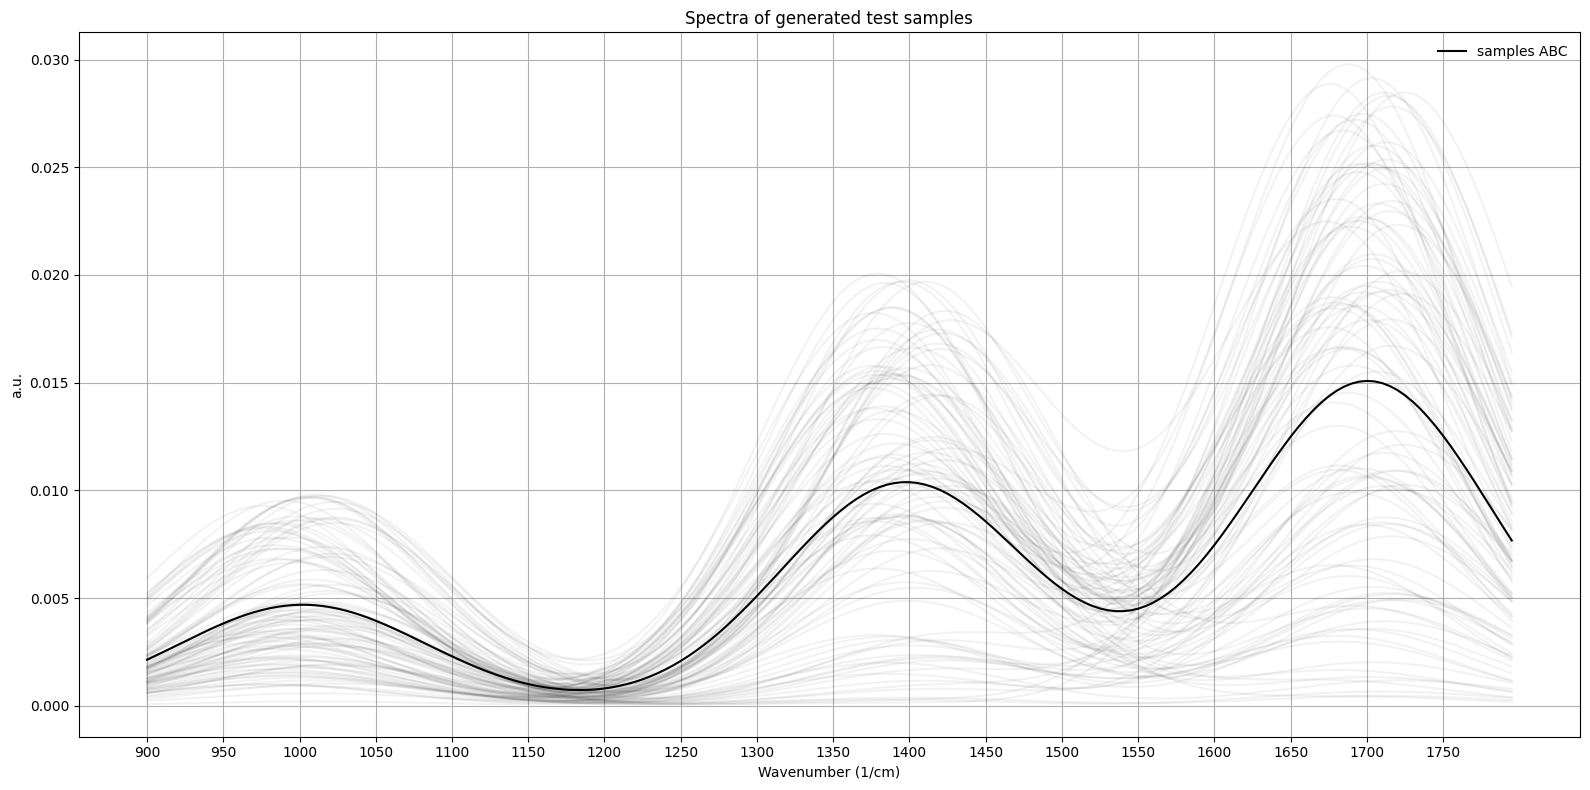

In [117]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [118]:
df1=ABC.copy()

In [119]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,0.630657,0.218432,0.200643
ABC_2,0.373742,1.143214,1.126718
ABC_3,1.960657,1.175177,1.996728
ABC_4,1.167874,0.486197,0.265535
ABC_5,0.798658,0.235473,0.963694
...,...,...,...
ABC_96,0.636598,1.010389,1.233267
ABC_97,0.447371,0.276126,0.667437
ABC_98,1.561310,1.661841,0.557880
ABC_99,0.640099,0.327877,0.707395


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



### Next step: 
Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 

In [121]:
X_train = df0.copy().T
X_test = df1.copy().T
y_train=labels_train.copy()

In [178]:
model = LogisticRegression()
model.fit(X_train, y_train)


/home/karol/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [179]:
y_pred = model.predict_proba(X_test)

sample_num = 20

In [180]:
y_pred[sample_num]

array([0.2739013 , 0.32636158, 0.39973711])

In [181]:
indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = y_pred[sample_num]*indiv_heights

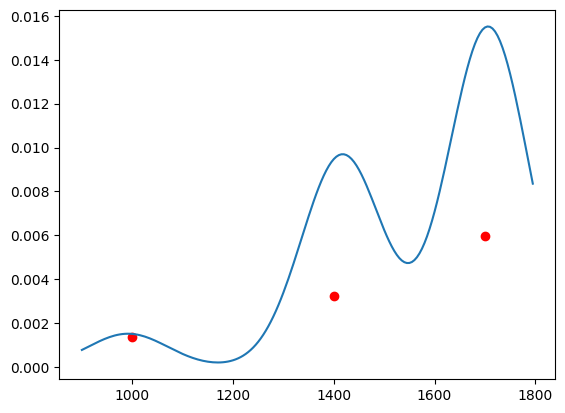

In [182]:
k = list(df0.index.unique())
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

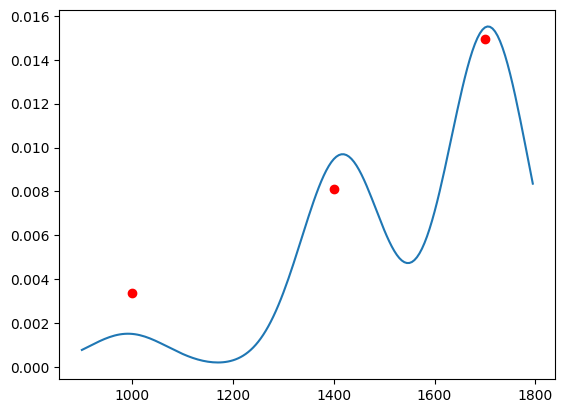

In [183]:
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights*2.5, color='red')
plt.show()

Logistic regression as actually a good start